# DATA SCIENCE TASK AT THE SPARKS FOUNDATION

# GRIP TASK-1 - Prediction using Supervised ML

# by -Deepika Bisht

In [20]:
#Importing all important libraries required.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Reading data from link
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data imoprted successfully")

data.head(10)

Data imoprted successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [23]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


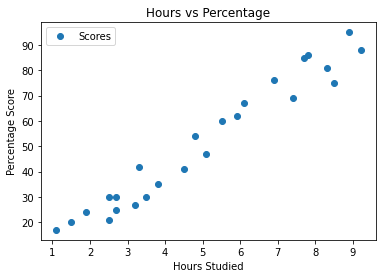

In [24]:
#plotting
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the above data, we can see there is a positive linear relation between the number of hours studied and percentage of scores.

## Preparing the data 

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#separating variables
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=200)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17, 1)
(8, 1)
(17,)
(8,)


# Training Algorithm

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

print("Training Complete.")

Training Complete.


In [30]:
#plotting the regression line

#defining first
slope=regressor.coef_
intercept=regressor.intercept_
line= slope*X+intercept

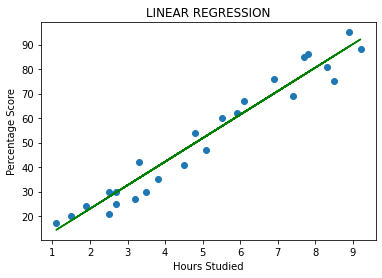

In [31]:
plt.scatter(X,Y)
plt.plot(X,line,color='green')
plt.title('LINEAR REGRESSION')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Making Prediction

In [32]:
#testing data- in hours
print(X_test)

#predicting scores
Y_pred=regressor.predict(X_test)


[[7.4]
 [3.8]
 [3.2]
 [1.9]
 [6.9]
 [6.1]
 [2.5]
 [1.5]]


In [33]:
#Comparing Actual vs Predicted
data=pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
data

,Actual,Predicted
0,69,74.847699
1,35,40.295061
2,27,34.536288
3,24,22.058946
4,76,70.048721
5,67,62.370357
6,21,27.817719
7,20,18.219764


# Prediction for Own Data

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [34]:
hours = [[9.25]]
own_pred= regressor.predict(hours)
print("No. of Hours = {}".format(hours))
print("Predicted Source = {}".format(own_pred[0]))

No. of Hours = [[9.25]]
Predicted Source = 92.60391577880367


# Evaluating the model

This is a final step to evaluate the performance of algorithm. For simplicity here, we have chosen the mean square error among all other metrics.

In [35]:
from sklearn import metrics
print("Mean Absolute Error = ", metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error =  4.9748721918004435
